# Experiments on the effect of learning parameters and mechanisms:
- learning rate
- batch size
- use of callbacks

In [7]:
from src import util
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
sensor_data_trainval, sequence_ids_trainval, labels_trainval = util.ingest_sensor_data('train.csv', 'train_labels.csv')
sensor_data_test, sequence_ids_test, _ = util.ingest_sensor_data('test.csv')

sensor_data_train, sequence_ids_train, labels_train, sensor_data_val, sequence_ids_val, labels_val = util.validation_split(training_fraction=0.7, sensor_data=sensor_data_trainval, sequence_ids=sequence_ids_trainval, labels=labels_trainval)

(25968, 60, 13) 25968
(12218, 60, 13) 12218


Epoch 1/50
650/650 [==============================] - 14s 18ms/step - loss: 0.6869 - accuracy: 0.5414 - auc: 0.5542 - val_loss: 0.6842 - val_accuracy: 0.5458 - val_auc: 0.5687 - lr: 1.0000e-04
Epoch 2/50
650/650 [==============================] - 11s 17ms/step - loss: 0.6841 - accuracy: 0.5510 - auc: 0.5699 - val_loss: 0.6834 - val_accuracy: 0.5551 - val_auc: 0.5872 - lr: 1.2589e-04
Epoch 3/50
650/650 [==============================] - 11s 17ms/step - loss: 0.6790 - accuracy: 0.5649 - auc: 0.5918 - val_loss: 0.6728 - val_accuracy: 0.5780 - val_auc: 0.6173 - lr: 1.5849e-04
Epoch 4/50
650/650 [==============================] - 10s 15ms/step - loss: 0.6721 - accuracy: 0.5838 - auc: 0.6147 - val_loss: 0.6678 - val_accuracy: 0.5891 - val_auc: 0.6299 - lr: 1.9953e-04
Epoch 5/50
650/650 [==============================] - 10s 16ms/step - loss: 0.6690 - accuracy: 0.5897 - auc: 0.6241 - val_loss: 0.6721 - val_accuracy: 0.5716 - val_auc: 0.6343 - lr: 2.5119e-04
Epoch 6/50
650/650 [===============

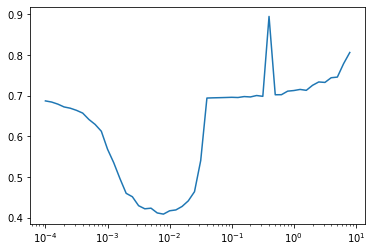

In [10]:
lstm_dim = 128
dense_dim=128
lstm_dropout=0.15

model = tf.keras.Sequential([
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=lstm_dim, input_shape=(60,13), dropout=lstm_dropout)),
    tf.keras.layers.Dense(dense_dim, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    #tf.keras.layers.Dense(10, activation='relu'),
    #tf.keras.layers.Dropout(0.4),
    
    tf.keras.layers.Dense(1, activation='sigmoid')
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10**(epoch / 10))
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy',tf.keras.metrics.AUC(name='auc')])


history=model.fit(util.preprocess_sensor_data(sensor_data_trainval), np.array(labels_trainval), validation_split=0.2, epochs=50, callbacks=[lr_schedule])

plt.semilogx(history.history["lr"], history.history["loss"])
#plt.axis([1e-8, 1e-4, 0, 30])
plt.show()